## Importamos librerias
Pandas, numpy y datetime para manipulación de datos.
plotly y matplorlob para la creación de graficos, junto con wordcloud para la creación de nubes de palabras.

In [1]:
import pandas as pd
import numpy as np
import plotly as plt
import datetime as dt
import matplotlib as mtp
from wordcloud import WordCloud, STOPWORDS

## Lectura de datos
Leemos el archivo "metadata.csv" y lo convertimos en un dataframe

In [2]:
metadata = pd.read_csv("./DB/metadata.csv", encoding='latin-1')

    
metadata

,ruta_relativa,texto descriptivo,resolucion,tamanio,tipo,lista de tags,ultimo perfil que actualizo,ultima aztualizacion
0,IMAGEN3.png,Michi gritando,450 x 300,0.1164703369140625 MB,image/png,"['michi llorando', 'gato', 'tristeza', 'gatos']",Susu,2023-06-13 12:15:48
1,IMAGEN1.png,El meme que siempre se uso para preguntarle a ...,450 x 300,0.12075328826904297 MB,image/png,"['pensa', 'nene', 'pensa', 'viejo', 'inteligen...",Susu,2023-06-13 11:32:52
2,IMAGEN4.png,Rana llorando,450 x 300,0.1049041748046875 MB,image/png,"['rana', 'llorando', 'animales', 'tristeza', '...",Susu,2023-06-13 12:31:42
3,capy.jpeg,Carpincho mirando de frente,262 x 192,0.007030487060546875 MB,image/jpeg,"['Capybara', 'Capy', 'Pipi']",Paulita,2023-05-31 19:15:35
4,capyBlanco.jpeg,"Tremendo, un carpincho color leche",316 x 159,0.005814552307128906 MB,image/jpeg,['Carpinchoblanco'],Paulita,2023-05-31 19:15:55
5,choripan.jpeg,"Que ganas de comer choripan, pero no puedo :(",300 x 168,0.009979248046875 MB,image/jpeg,"['Chori', 'Pan']",Paulita,2023-05-31 19:16:29
6,unaManteca.jpg,Es una manteca,700 x 700,0.04684734344482422 MB,image/jpeg,"['Manteca', 'Laserenisima']",Susu,2023-06-01 14:02:27
7,IMAGEN2.png,La ninia que mira pa tras when la casa esta po...,450 x 300,0.13325119018554688 MB,image/png,"['mirar', 'jajaja', 'nena']",Susu,2023-06-13 12:45:35
8,stickman.jpeg,"Es un tipito dibujado, listo.",474 x 413,0.0060214996337890625 MB,image/jpeg,"['stickman', 'dibujito']",Carl,2023-06-02 15:05:56
9,stickman.png,Es un stickman feli,474 x 497,0.013050079345703125 MB,image/jpeg,"['feliz', 'felicidad', 'stickman']",Carl,2023-06-02 15:06:21


## Descripción del dataframe
Nos traemos la información necesaria para conocer más a profundidad el dataframe

In [3]:
metadata.shape

(21, 8)

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ruta_relativa                21 non-null     object
 1   texto descriptivo            21 non-null     object
 2   resolucion                   21 non-null     object
 3   tamanio                      21 non-null     object
 4   tipo                         21 non-null     object
 5   lista de tags                21 non-null     object
 6   ultimo perfil que actualizo  21 non-null     object
 7   ultima aztualizacion         21 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


## Transformación y limpieza de datos

rula_relativa -> El nombre de la columna pasara a ser "nombre" y limpiaremos el dato sacando los espacios en blanco y eliminando todo lo que esté posterior al punto anterior de la extensión inclusive

resolucion -> de esta columna crearemos dos columnas: "alto" y "ancho"

tamanio -> generaremos la columna "tamanio en Megabytes" y nos quedaremos solo con el numero y acortaremos su cantidad de espacio en memoria.

tipo -> Solo nos quedaremos con la extensión

ultima actualizacion -> Lo convertiremos en tipo fecha y hora

ultimo perfil que actualizo -> se elimina

lista de tags -> convertimos el string a array de numpy

In [5]:
df = metadata.copy()

In [6]:
# Renombrar la columna 'ruta_relativa' a 'nombre' y limpiar el tipo de dato
df = df.rename(columns={'ruta_relativa': 'nombre'})
df['nombre'] = df['nombre'].astype(str).apply(lambda name: name.split('.')[0])

# Extraer el ancho y alto de la columna 'resolucion' y convertir a enteros
df['ancho'] = df['resolucion'].apply(lambda num: num.split(" ")[0]).astype('int16')
df['alto'] = df['resolucion'].apply(lambda num: num.split(" ")[2]).astype('int16')
# Eliminamos la columna resolucion
df.drop('resolucion', axis=1, inplace=True)  

# Convertir el tamaño de presentacion de megabytes a bytes
df = df.rename(columns={'tamanio': 'Bytes'})
df['Bytes'] = df['Bytes'].apply(lambda string: string[:-2]).astype(float)
df['Bytes'] *= 1048576

# Extraer la extensión de la columna 'tipo'
df = df.rename(columns={'tipo': 'extension'})
df['extension'] = df['extension'].apply(lambda ext: ext.split("/")[1])

# Asegurar que 'ultima actualizacion' sea de tipo fecha y hora, y corregir el nombre
df = df.rename(columns={'ultima aztualizacion': 'ultima actualizacion'})
df['ultima actualizacion'] = pd.to_datetime(df['ultima actualizacion'])

# Convertir la lista de tags de tipo string a un array de numpy
df['lista de tags'] = df['lista de tags'].apply(lambda tags: np.array(eval(tags)))



In [7]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   nombre                       21 non-null     object        
 1   texto descriptivo            21 non-null     object        
 2   Bytes                        21 non-null     float64       
 3   extension                    21 non-null     object        
 4   lista de tags                21 non-null     object        
 5   ultimo perfil que actualizo  21 non-null     object        
 6   ultima actualizacion         21 non-null     datetime64[ns]
 7   ancho                        21 non-null     int16         
 8   alto                         21 non-null     int16         
dtypes: datetime64[ns](1), float64(1), int16(2), object(5)
memory usage: 1.4+ KB


,nombre,texto descriptivo,Bytes,extension,lista de tags,ultimo perfil que actualizo,ultima actualizacion,ancho,alto
0,IMAGEN3,Michi gritando,122128.0,png,"[michi llorando, gato, tristeza, gatos]",Susu,2023-06-13 12:15:48,450,300
1,IMAGEN1,El meme que siempre se uso para preguntarle a ...,126619.0,png,"[pensa, nene, pensa, viejo, inteligencia, viej...",Susu,2023-06-13 11:32:52,450,300
2,IMAGEN4,Rana llorando,110000.0,png,"[rana, llorando, animales, tristeza, viejuno]",Susu,2023-06-13 12:31:42,450,300
3,capy,Carpincho mirando de frente,7372.0,jpeg,"[Capybara, Capy, Pipi]",Paulita,2023-05-31 19:15:35,262,192
4,capyBlanco,"Tremendo, un carpincho color leche",6097.0,jpeg,[Carpinchoblanco],Paulita,2023-05-31 19:15:55,316,159
5,choripan,"Que ganas de comer choripan, pero no puedo :(",10464.0,jpeg,"[Chori, Pan]",Paulita,2023-05-31 19:16:29,300,168
6,unaManteca,Es una manteca,49123.0,jpeg,"[Manteca, Laserenisima]",Susu,2023-06-01 14:02:27,700,700
7,IMAGEN2,La ninia que mira pa tras when la casa esta po...,139724.0,png,"[mirar, jajaja, nena]",Susu,2023-06-13 12:45:35,450,300
8,stickman,"Es un tipito dibujado, listo.",6314.0,jpeg,"[stickman, dibujito]",Carl,2023-06-02 15:05:56,474,413
9,stickman,Es un stickman feli,13684.0,jpeg,"[feliz, felicidad, stickman]",Carl,2023-06-02 15:06:21,474,497


## Gráfico de torta que muestra los porcentajes según el tipo de imagen

In [8]:
# Crear un array de numpy con las extensiones de la columna 'extension'
array_extensiones = np.array(df['extension'])

# Obtener los valores únicos y sus conteos de aparición
values, counts = np.unique(array_extensiones, return_counts=True)


In [9]:

# Crear una figura de tipo Pie con los valores y conteos obtenidos
fig = plt.graph_objects.Figure(data=[plt.graph_objects.Pie(labels=values, values=counts)])

# Configurar la información que se muestra al pasar el cursor y el tamaño del texto
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=14)

# Configurar el título de la gráfica y el tamaño de la fuente del título
fig.update_layout(title='Distribución extensiones', title_font_size=20)

# Mostrar la figura
fig.show()




## Valores máximos de ancho y de alto de las imágenes clasificadas.

In [10]:
array_anchos = np.array(df['ancho'])
array_altos = np.array(df['alto'])
max_ancho = np.max(array_anchos)
max_alto = np.max(array_altos)

print(f'El ancho maximo es: {max_ancho} en pixeles')
print(f'El alto maximo es: {max_alto} en pixeles')


El ancho maximo es: 700 en pixeles
El alto maximo es: 700 en pixeles


### Generar un gráfico de dispersión para visualizar la relación entre el ancho y el alto de las imágenes.



In [11]:
data = {
    'nombre': df['nombre'],
    'ancho': df['ancho'],
    'alto': df['alto']
}
df_dispersion = pd.DataFrame(data)

fig = plt.graph_objs.Figure(data = plt.graph_objs.Scatter(
    x = df_dispersion['ancho'],
    y = df_dispersion['alto'],
    mode = 'markers'
))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de dispersión',
    xaxis_title='Ancho en pixeles',
    yaxis_title='Alto en pixeles'
)

# Mostrar el gráfico
fig.show()

## Modificaciones de etiquetas por día de la semana


In [12]:
# Obtener los días de la semana en orden
order_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Calcular los cambios por día de la semana y ordenarlos
cambios_por_dia = df['dia_semana'].value_counts().reindex(order_days).fillna(0)

# Crear la figura de barras
fig = plt.graph_objs.Figure(data=plt.graph_objs.Bar(
    x=cambios_por_dia.index,
    y=cambios_por_dia.values
))

# Actualizar el diseño de la figura
fig.update_layout(
    title='Cambios realizados por día de la semana',
    xaxis=dict(
        title='Día de la semana',
        categoryarray=order_days  # Establecer el orden de las categorías en el eje x
    ),
    yaxis=dict(
        title='Cantidad de cambios'
    )
)

# Mostrar la figura
fig.show()

KeyError: 'dia_semana'

## Gráfico de evolucion de modificaciones en el tiempo

In [ ]:
array_fechas = np.array(df['ultima actualizacion'].dt.date)
values, counts = np.unique(array_fechas, return_counts=True)

fig = plt.graph_objects.Figure(data=plt.graph_objects.Scatter(
    x = values,
    y = counts,
    mode='lines'
))

fig.update_layout(
    title='Evolución de la cantidad de actualizaciones',
    xaxis_title='Fecha',
    yaxis_title='Cantidad de actualizaciones'
)

fig.show()


## Palabras más usadas para etiquetar imagenes

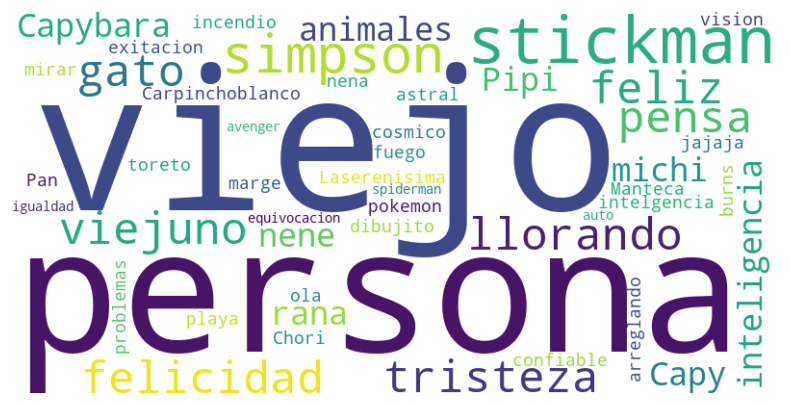

In [ ]:
array_tags = np.array(df['lista de tags'])
total_tags = np.array([])
for array in array_tags:
    total_tags = np.concatenate((total_tags,array))

text = ' '.join(total_tags)

# Crear el objeto WordCloud y generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
mtp.pyplot.figure(figsize=(10, 5))
mtp.pyplot.imshow(wordcloud, interpolation='bilinear')
mtp.pyplot.axis('off')
mtp.pyplot.show()

# Top 3 de más palabras utilizadas

In [ ]:
# Dividir el texto en palabras
palabras = text.split()

# Crear una Serie de pandas con los recuentos de palabras
serie_palabras = pd.Series(palabras)

# Contar la frecuencia de cada palabra
recuentos = serie_palabras.value_counts()

# Ordenar los resultados en orden descendente
recuentos_ordenados = recuentos.sort_values(ascending=False)

# Mostrar los primeros 3 resultados más frecuentes
print(recuentos_ordenados.head(3))


viejo      5
persona    5
simpson    3
Name: count, dtype: int64


## Promedio de imagenes actualizada por cada perfil top 3

In [ ]:
# Seleccionar las columnas 'ultimo perfil que actualizo' y 'Bytes' del DataFrame
df[['ultimo perfil que actualizo', 'Bytes']]

# Calcular el promedio del tamaño (en bytes) agrupado por 'ultimo perfil que actualizo'
df_promedio = df.groupby('ultimo perfil que actualizo')['Bytes'].mean()

# Crear un nuevo DataFrame con los resultados
df_resultado = pd.DataFrame({'Perfil': df_promedio.index, 'Tamaño Promedio (B)': df_promedio.values})

# Mostrar el resultado
print(df_resultado)


    Perfil  Tamaño Promedio (B)
0     Carl         10477.666667
1    Josef        151301.000000
2  Paulita         60308.000000
3     Susu        127852.833333


## Análisis logs del sistema:

El objetivo principal de esta sección es hacer un análisis del uso de nuestra aplicación a partir de la información que fuimos registrando en logs del sistema. Se van a analizar datos de creación de perfiles, clasificación de imágenes, eventos de la aplicación, collages y memes generados. A partir de esos datos se van a hacer gráficos representativos que reflejen lo analizado

In [ ]:
import matplotlib.pyplot as plt
from compartidos.acceso_a_datos import info_de_todos_los_perfiles
from configuracion.settings import METADATA_DIR_LOGS

##### Lectura de datos:

La información registrada en nuestro archivo, volcada en un dataframe, es la siguiente:

In [ ]:
df_logs = pd.read_csv(METADATA_DIR_LOGS, encoding='latin-1')
df_logs

,fecha,usuario,accion,valores,textos
0,25/05/23 12:17:30,Carl,creacion_perfil,NaN,NaN
1,25/05/23 18:17:30,Carl,cambio_configuracion_sistema,NaN,NaN
2,25/05/23 19:17:30,Carl,nueva_imagen_clasificada,NaN,NaN
3,25/05/23 20:17:30,Carl,nuevo_collage,parche.png;burns.png;ruta.png,vacaciones
4,29/05/23 18:17:30,Facu,creacion_perfil,NaN,NaN
5,30/05/23 18:17:30,Facu,modificacion_perfil,NaN,NaN
6,31/05/23 18:17:30,Susu,creacion_perfil,NaN,NaN
7,01/06/23 10:17:30,Susu,nuevo_meme,parche.png,salvado;siiii
8,01/06/23 18:17:30,Josef,creacion_perfil,NaN,NaN
9,03/06/23 11:17:30,Susu,nuevo_meme,burns.png,error404


Información resumida del dataframe:

In [ ]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fecha    41 non-null     object
 1   usuario  41 non-null     object
 2   accion   41 non-null     object
 3   valores  19 non-null     object
 4   textos   19 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


##### Limpieza del dataframe:

De la información leida de archivo csv, es importante considerar que hay información inútil (la correspondiente a registros vacíos del csv). Por lo tanto, se realiza un filtrado para eliminar dichos registros y garantizar que el dataframe sea válido para su posterior análisis.

In [ ]:
df_logs['valores'].fillna('', inplace=True)
df_logs['textos'].fillna('', inplace=True)
df_logs.head(15)

,fecha,usuario,accion,valores,textos
0,25/05/23 12:17:30,Carl,creacion_perfil,,
1,25/05/23 18:17:30,Carl,cambio_configuracion_sistema,,
2,25/05/23 19:17:30,Carl,nueva_imagen_clasificada,,
3,25/05/23 20:17:30,Carl,nuevo_collage,parche.png;burns.png;ruta.png,vacaciones
4,29/05/23 18:17:30,Facu,creacion_perfil,,
5,30/05/23 18:17:30,Facu,modificacion_perfil,,
6,31/05/23 18:17:30,Susu,creacion_perfil,,
7,01/06/23 10:17:30,Susu,nuevo_meme,parche.png,salvado;siiii
8,01/06/23 18:17:30,Josef,creacion_perfil,,
9,03/06/23 11:17:30,Susu,nuevo_meme,burns.png,error404


##### Estrategia para el análisis:

A partir de las columnas del dataframe de logs, y dado el caso, se crearán nuevas columnas que contengan información de la que se pueden extraer datos útiles para graficar. A su vez, se pueden crear nuevos dataframe que resuman la información de cada análisis.

### Gráfico comparando los días de la semana en que se realizaron operaciones usando la aplicación

Objetivo: realizar un gráfico de barras para representar los días de uso de unlpimage.

Se convierte lo almacenado en cada entrada de la columna 'fecha' de df_logs a un timestamp correcto; gracias a ello puedo agregar una nueva columna 'dia', que corresponde al día de la semana en que se uso la aplicación. De ella extraeremos los datos de análisis

In [ ]:
df_logs['fecha'] = pd.to_datetime(df_logs['fecha'], format='%d/%m/%y %H:%M:%S')
df_logs['dia'] = df_logs['fecha'].dt.day_name()
df_logs.head(20)

,fecha,usuario,accion,valores,textos,dia
0,2023-05-25 12:17:30,Carl,creacion_perfil,,,Thursday
1,2023-05-25 18:17:30,Carl,cambio_configuracion_sistema,,,Thursday
2,2023-05-25 19:17:30,Carl,nueva_imagen_clasificada,,,Thursday
3,2023-05-25 20:17:30,Carl,nuevo_collage,parche.png;burns.png;ruta.png,vacaciones,Thursday
4,2023-05-29 18:17:30,Facu,creacion_perfil,,,Monday
5,2023-05-30 18:17:30,Facu,modificacion_perfil,,,Tuesday
6,2023-05-31 18:17:30,Susu,creacion_perfil,,,Wednesday
7,2023-06-01 10:17:30,Susu,nuevo_meme,parche.png,salvado;siiii,Thursday
8,2023-06-01 18:17:30,Josef,creacion_perfil,,,Thursday
9,2023-06-03 11:17:30,Susu,nuevo_meme,burns.png,error404,Saturday


Quiero que cada entrada de la columna 'dia' tenga las abreviaturas de los nombres de los días en español. Para transformarlos, creo un diccionario con la equivalencia de nombres y lo uso en combinación con la función map de pandas para reemplazar los valores de dicha columna

In [ ]:
nombres_dias = {
    'Monday': 'L',
    'Tuesday': 'Ma',
    'Wednesday': 'Mi',
    'Thursday': 'J',
    'Friday': 'V',
    'Saturday': 'S',
    'Sunday': 'D'
}

df_logs['dia'] = df_logs['dia'].map(nombres_dias)
df_logs[['fecha', 'dia']].head(15)

,fecha,dia
0,2023-05-25 12:17:30,J
1,2023-05-25 18:17:30,J
2,2023-05-25 19:17:30,J
3,2023-05-25 20:17:30,J
4,2023-05-29 18:17:30,L
5,2023-05-30 18:17:30,Ma
6,2023-05-31 18:17:30,Mi
7,2023-06-01 10:17:30,J
8,2023-06-01 18:17:30,J
9,2023-06-03 11:17:30,S


Cuento la totalidad por día de usos de la aplicación generados en la columna 'dia':

In [ ]:
df_logs['dia'].value_counts()

dia
S     21
J      9
Mi     6
D      3
L      1
Ma     1
Name: count, dtype: int64

Con esto, creo un dateframe de días de uso:

In [ ]:
df_dias_de_uso = pd.DataFrame({'dia':df_logs['dia'].value_counts().index, 'cantidad':df_logs['dia'].value_counts().values})
df_dias_de_uso

,dia,cantidad
0,S,21
1,J,9
2,Mi,6
3,D,3
4,L,1
5,Ma,1


Ya que puede haber casos donde no aparezcan los nombres de todos los días (por no tener activad en esos días) hago lo siguiente: adicionalmente creo otro dataframe df_dias_semana con los nombres de todos los días de la semana y sus cantidades inicializadas en cero; con esto tengo una estructura base, o plantilla, para los datos de los días de la semana. Al crearlo con valores iniciales en cero, cuando lo una a df_dias_de_uso, se garantiza que haya una fila para cada día de la semana, incluso si no hay datos disponibles para algunos días.

In [ ]:
df_dias_semana = pd.DataFrame({'dia':['L','Ma','Mi','J','V','S','D'],
                                'cantidad':[0,0,0,0,0,0,0]})
df_dias_semana

,dia,cantidad
0,L,0
1,Ma,0
2,Mi,0
3,J,0
4,V,0
5,S,0
6,D,0


Resultado de la union de df_dias_de_uso y df_dias_semana:

In [ ]:
df_dias = pd.merge(df_dias_semana, df_dias_de_uso, how='outer')
df_dias

,dia,cantidad
0,L,0
1,Ma,0
2,Mi,0
3,J,0
4,V,0
5,S,0
6,D,0
7,S,21
8,J,9
9,Mi,6


Ahora queda agrupar por día y sumar las respectivas cantidades agrupadas. Lo resultante es lo que se va a graficar

In [ ]:
df_dias = df_dias.groupby(df_dias['dia']).sum()
df_dias = df_dias.reset_index()
df_dias

,dia,cantidad
0,D,3
1,J,9
2,L,1
3,Ma,1
4,Mi,6
5,S,21
6,V,0


Antes de graficar hay que asegurarse de que los días de la semana se muestren en un orden específico, que la representación visual de los datos en el gráfico de barras que se va a hacer, se muestren de una manera legible y sigan la secuencia lógica de los días de una semana.
Utilizo categorical de pandas para lograrlo: la columna 'dia' se convierte en una variable categorica, pasandole como criterio de ordenación una lista creada

In [ ]:
# lista nombres de los días ordenados
dias_ordenados = ['L', 'Ma', 'Mi', 'J', 'V', 'S', 'D']

# se usa Categorical de pandas sobre 'día'
df_dias['dia'] = pd.Categorical(df_dias['dia'], categories=dias_ordenados, ordered=True)

# ordenacion correcta
df_dias = df_dias.sort_values('dia')
df_dias

,dia,cantidad
2,L,1
3,Ma,1
4,Mi,6
1,J,9
6,V,0
5,S,21
0,D,3


##### Gráfico final:

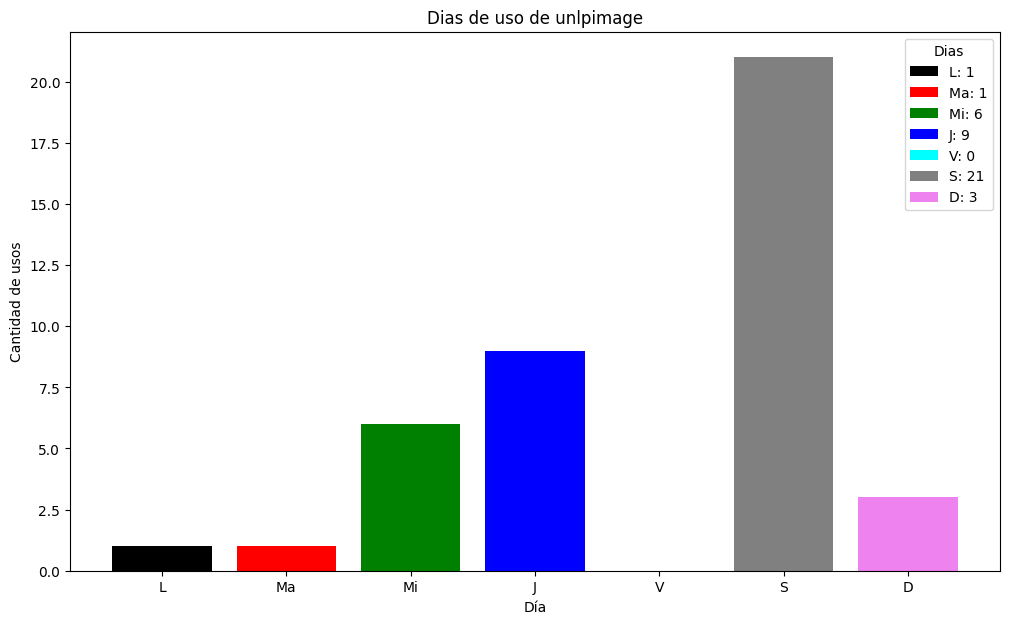

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
etiquetas = [f'{dia}: {cantidad}' for dia, cantidad in zip(df_dias['dia'], df_dias['cantidad'])]
bar_colors = ['black', 'red', 'green', 'blue', 'cyan', 'grey', 'violet',]
ax.bar(df_dias['dia'], df_dias['cantidad'], label=etiquetas, color=bar_colors)
ax.set_xlabel('Día')
ax.set_ylabel('Cantidad de usos')
ax.set_title('Dias de uso de unlpimage')
ax.legend(title='Dias')

plt.show()

### Gráfico que muestra los porcentajes de uso de la aplicación por género

Objetivo: realizar un grafico de torta para representar el uso de unlpimage de acuerdo al genero elegido de sus usuarios

En nuestro archivo json de perfiles cuento con la siguiente información de los usuarios:

In [ ]:
perfiles_usuarios = info_de_todos_los_perfiles()
perfiles_usuarios

[{'alias': 'Josef',
  'nombre': 'Josefina',
  'edad': '32',
  'genero': 'Femenino',
  'imagen': 'perfil2.png'},
 {'alias': 'Susu',
  'nombre': 'Susana',
  'edad': '20',
  'genero': 'Masculino',
  'imagen': 'perfil3.png'},
 {'alias': 'Paulita',
  'nombre': 'Paula',
  'edad': '46',
  'genero': 'Femenino',
  'imagen': 'perfil2.png'},
 {'alias': 'Carl',
  'nombre': 'Carlos',
  'edad': '30',
  'genero': 'Masculino',
  'imagen': 'perfil1.png'},
 {'alias': 'Facu',
  'nombre': 'Facundo',
  'edad': '47',
  'genero': 'Masculino',
  'imagen': 'perfil1.png'},
 {'alias': 'Dam',
  'nombre': 'Damian',
  'edad': '18',
  'genero': 'Masculino',
  'imagen': 'perfil4.png'}]

Quiero obtener, a partir de ella, un diccionario que vincule al usuario con el genero que eligió; hago esto a través de map:

In [ ]:
usuarios_y_generos = dict(map(lambda x: (x['alias'], x['genero']), perfiles_usuarios))
usuarios_y_generos

{'Josef': 'Femenino',
 'Susu': 'Masculino',
 'Paulita': 'Femenino',
 'Carl': 'Masculino',
 'Facu': 'Masculino',
 'Dam': 'Masculino'}

En mi dataframe creo una nueva columna 'genero'. En ella, a cada entrada de usuario, se le asigna el genero elegido desde el diccionario creado

In [ ]:
df_logs['genero'] = df_logs['usuario'].map(usuarios_y_generos)
df_logs[['usuario','genero']].head(15)

,usuario,genero
0,Carl,Masculino
1,Carl,Masculino
2,Carl,Masculino
3,Carl,Masculino
4,Facu,Masculino
5,Facu,Masculino
6,Susu,Masculino
7,Susu,Masculino
8,Josef,Femenino
9,Susu,Masculino


Y con eso tengo los usos por genero de la aplicación:

In [ ]:
usos_por_genero= df_logs['genero'].value_counts()
usos_por_genero

genero
Masculino    28
Femenino     13
Name: count, dtype: int64

Creo el gráfico a partir esos datos resultantes

#### Gráfico final

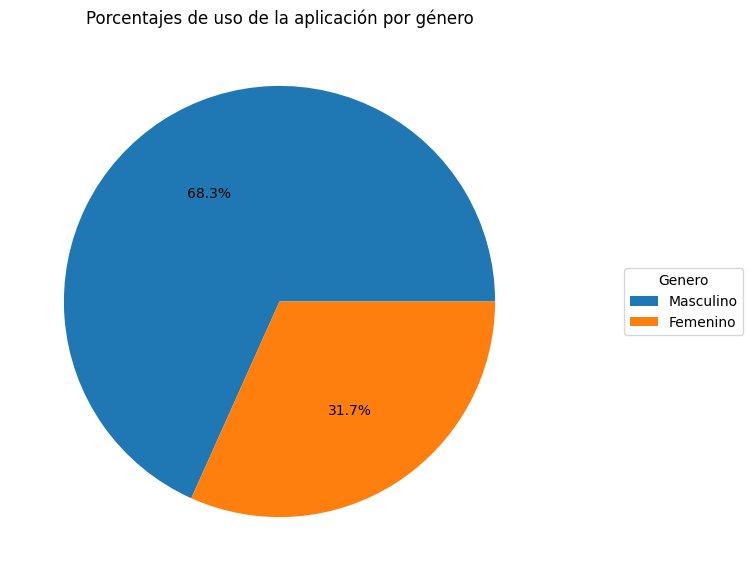

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(usos_por_genero, autopct='%1.1f%%')

ax.legend(usos_por_genero.index,
          title='Genero',
          loc='center',
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Porcentajes de uso de la aplicación por género')

plt.show()

### Gráfico que refleja las cantidades de cada operación realizada

Objetivo: realizar un gráfico de barras que represente la comparación de acciones realizadas en unlpimage por sus usuarios

Esta información la obtengo de la columna 'accion' de df_logs. En ella cuento la cantidad de veces que aparecen las acciones registradas.

Lo que tengo es lo siguiente:

In [ ]:
operaciones_realizadas = df_logs['accion'].value_counts().sort_index()
operaciones_realizadas

accion
cambio_configuracion_sistema     4
cambio_imagen_clasificada        5
creacion_perfil                  6
modificacion_perfil              5
nueva_imagen_clasificada         3
nuevo_collage                   10
nuevo_meme                       8
Name: count, dtype: int64

Y estos datos son los que grafico

#### Gráfico final

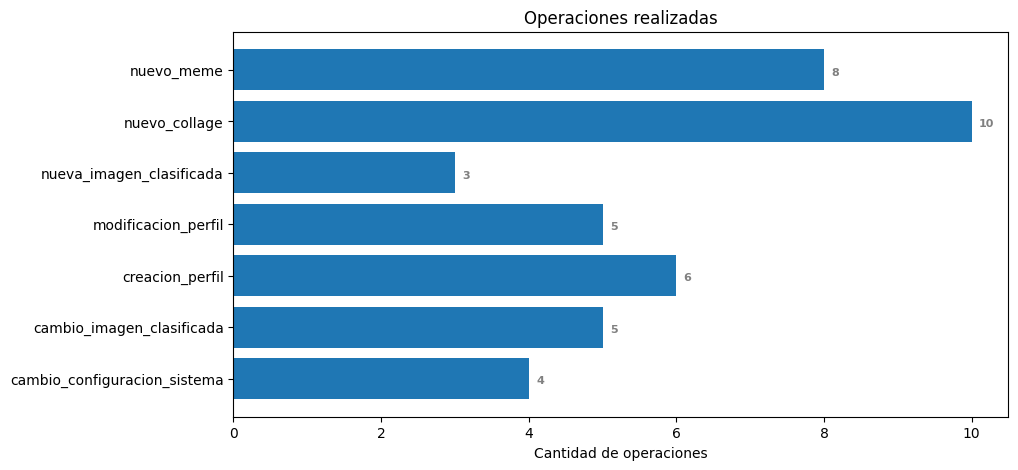

In [ ]:
figura, ax = plt.subplots(figsize =(10, 5))
ax.barh(operaciones_realizadas.index, operaciones_realizadas.values)
for barra in ax.patches:
    plt.text(barra.get_width()+0.1, barra.get_y()+0.3,
             str(barra.get_width()),
             fontsize = 8, fontweight ='bold',
             color ='grey')
ax.set_xlabel('Cantidad de operaciones')
ax.set_title('Operaciones realizadas')

plt.show()

### Gráfico que muestra las cantidades de operaciones por nick

Objetivo: realizar un gráfico de barras apilado que represente la comparación de acciones realizadas por cada nick

Esta información la obtengo de la columna 'accion' de df_logs

In [ ]:
df_nick_y_acciones = df_logs[['usuario','accion']]
df_logs[['usuario','accion']].head(15)

,usuario,accion
0,Carl,creacion_perfil
1,Carl,cambio_configuracion_sistema
2,Carl,nueva_imagen_clasificada
3,Carl,nuevo_collage
4,Facu,creacion_perfil
5,Facu,modificacion_perfil
6,Susu,creacion_perfil
7,Susu,nuevo_meme
8,Josef,creacion_perfil
9,Susu,nuevo_meme


En ella cuento la cantidad de veces que aparecen las acciones registradas y agrupadas por cada usuario.

Tengo:

In [ ]:
df_operaciones = df_logs.groupby(['usuario', 'accion']).size()
df_operaciones

usuario  accion                      
Carl     cambio_configuracion_sistema    2
         cambio_imagen_clasificada       1
         creacion_perfil                 1
         modificacion_perfil             1
         nueva_imagen_clasificada        1
         nuevo_collage                   1
         nuevo_meme                      2
Dam      cambio_imagen_clasificada       2
         creacion_perfil                 1
         nueva_imagen_clasificada        1
         nuevo_collage                   1
Facu     creacion_perfil                 1
         modificacion_perfil             1
         nuevo_meme                      3
Josef    cambio_configuracion_sistema    1
         creacion_perfil                 1
         modificacion_perfil             2
         nuevo_collage                   4
Paulita  cambio_imagen_clasificada       1
         creacion_perfil                 1
         nueva_imagen_clasificada        1
         nuevo_collage                   1
         nuevo_m

Para poder graficar correctamente, vuelco esos datos en un dataframe

In [ ]:
df_operaciones = df_operaciones.unstack()
df_operaciones

accion,cambio_configuracion_sistema,cambio_imagen_clasificada,creacion_perfil,modificacion_perfil,nueva_imagen_clasificada,nuevo_collage,nuevo_meme
usuario,,,,,,,
Carl,2.0,1.0,1.0,1.0,1.0,1.0,2.0
Dam,NaN,2.0,1.0,NaN,1.0,1.0,NaN
Facu,NaN,NaN,1.0,1.0,NaN,NaN,3.0
Josef,1.0,NaN,1.0,2.0,NaN,4.0,NaN
Paulita,NaN,1.0,1.0,NaN,1.0,1.0,1.0
Susu,1.0,1.0,1.0,1.0,NaN,3.0,2.0


Como el dataframe generado tiene información inútil (celdas con NaN), debo hacer un reemplazo de éstas por un dato procesable para el gráfico

In [ ]:
# limpio dataframe
df_operaciones = df_operaciones.fillna(0)
df_operaciones

accion,cambio_configuracion_sistema,cambio_imagen_clasificada,creacion_perfil,modificacion_perfil,nueva_imagen_clasificada,nuevo_collage,nuevo_meme
usuario,,,,,,,
Carl,2.0,1.0,1.0,1.0,1.0,1.0,2.0
Dam,0.0,2.0,1.0,0.0,1.0,1.0,0.0
Facu,0.0,0.0,1.0,1.0,0.0,0.0,3.0
Josef,1.0,0.0,1.0,2.0,0.0,4.0,0.0
Paulita,0.0,1.0,1.0,0.0,1.0,1.0,1.0
Susu,1.0,1.0,1.0,1.0,0.0,3.0,2.0


Y con esto puedo graficar

#### Gráfico final

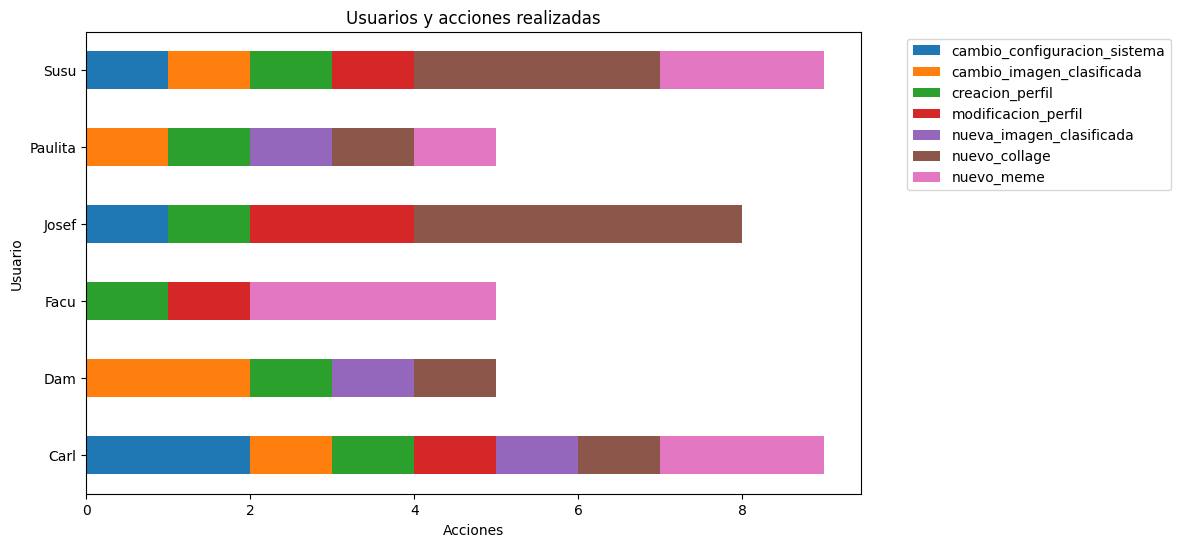

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_operaciones.plot.barh(stacked=True, ax=ax)
plt.xlabel('Acciones')
plt.ylabel('Usuario')
plt.title('Usuarios y acciones realizadas')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Ranking de las 5 imágenes más usadas para generar memes

Objetivo: representar en un ranking las 5 imágenes más usadas en generación de memes

Esta información la obtengo desde la columna 'accion' y 'valores' de df_logs: del dataframe filtro y me quedo con las filas cuya acción sea 'nuevo meme'. En la columnas 'valores' me van a quedar la totalidad de imagenes que se usaron para generar los memes

In [ ]:
df_imagenes_memes = df_logs[(df_logs['accion'] == 'nuevo_meme')].copy()
df_imagenes_memes[['accion', 'valores']]

,accion,valores
7,nuevo_meme,parche.png
9,nuevo_meme,burns.png
13,nuevo_meme,zorro.png
14,nuevo_meme,spidermans.png
17,nuevo_meme,ruta.png
31,nuevo_meme,inteligente.png
33,nuevo_meme,inteligente.png
38,nuevo_meme,incendio.png


Los datos guardados en 'valores' los proceso, y organizo:

In [ ]:
imagenes_memes = df_imagenes_memes.groupby(df_logs['valores']).size()
imagenes_memes

valores
burns.png          1
incendio.png       1
inteligente.png    2
parche.png         1
ruta.png           1
spidermans.png     1
zorro.png          1
dtype: int64

Luego los ordeno, me quedo con los primeros 5 y con ellos elaboro el ranking:

In [ ]:
imagenes_memes = imagenes_memes.sort_values(ascending=False).head(5)

print ('Imagenes más usadas para memes')
print ('-' * 33)
imagenes_memes

Imagenes más usadas para memes
---------------------------------


valores
inteligente.png    2
burns.png          1
incendio.png       1
parche.png         1
ruta.png           1
dtype: int64

### Ranking de las 5 imágenes más usadas para generar collages

Objetivo: representar en un ranking las 5 imágenes más usadas en generación de collages

Dicha información la obtengo desde la columna 'accion' y 'valores' de df_logs: del dataframe filtro y me quedo con las filas cuya acción sea 'nuevo collage'. En la columnas 'valores' me van a quedar la totalidad de imagenes que se usaron para generar los memes

In [ ]:
df_imagenes_collages = df_logs[(df_logs['accion'] == 'nuevo_collage')].copy()
df_imagenes_collages[['accion', 'valores']]

,accion,valores
3,nuevo_collage,parche.png;burns.png;ruta.png
10,nuevo_collage,incendio.png;burns.png
12,nuevo_collage,parche.png;burns.png
19,nuevo_collage,marge.png;ola.png
20,nuevo_collage,spidermans.png;inteligente.png;zorro.png
24,nuevo_collage,ola.png;tumba.png;zorro.png
26,nuevo_collage,ruta.png;burns.png;spidermans.png
30,nuevo_collage,spidermans.png;parche.png;burns.png
32,nuevo_collage,marge.png;burns.png
36,nuevo_collage,parche;spidermans.png;inteligente.png;zorro.png


Los datos contenidos en 'valores' debo transformarlos en algo que pueda procesar: las palabras de cada celda deben quedar separadas individualmente. Queda lo siguiente:

In [ ]:
imagenes_collages = df_imagenes_collages['valores'].str.split(';')
imagenes_collages

3                     [parche.png, burns.png, ruta.png]
10                            [incendio.png, burns.png]
12                              [parche.png, burns.png]
19                                 [marge.png, ola.png]
20         [spidermans.png, inteligente.png, zorro.png]
24                      [ola.png, tumba.png, zorro.png]
26                [ruta.png, burns.png, spidermans.png]
30              [spidermans.png, parche.png, burns.png]
32                               [marge.png, burns.png]
36    [parche, spidermans.png, inteligente.png, zorr...
Name: valores, dtype: object

Tengo los siguiente valores por cada palabra:

In [ ]:
imagenes_collages = imagenes_collages.explode().value_counts()
imagenes_collages

valores
burns.png          6
spidermans.png     4
parche.png         3
zorro.png          3
ruta.png           2
marge.png          2
ola.png            2
inteligente.png    2
incendio.png       1
tumba.png          1
parche             1
Name: count, dtype: int64

Me quedo con los 5 primeros para elaborar el ranking:

In [ ]:
print ('Imagenes más usadas para collages')
print ('-' * 33)
imagenes_collages.head(5)

Imagenes más usadas para collages
---------------------------------


valores
burns.png         6
spidermans.png    4
parche.png        3
zorro.png         3
ruta.png          2
Name: count, dtype: int64

### Nube de palabras de los textos agregados en los collages

Objetivo: generar un grafico de nube con los textos de collages

Del dataframe anterior, df_imagenes_collages, puedo obtener de la columna 'textos' la información que necesito de las palabras que se usaron para generar los collages.

Las palabras de esa columna, sin repetirlas, son:

In [ ]:
palabras_collage = df_imagenes_collages['textos'].unique()
palabras_collage

array(['vacaciones', 'calor', 'arreglado', 'Mar del Plata', 'aaahhh',
       'saludable', 'Viaje', 'noche', 'Bariloche', 'camping'],
      dtype=object)

En ellas, hago una limpieza de los strings y con eso ya puedo graficar la nube

In [ ]:
texto = str(palabras_collage).replace("'", "")
texto

'[vacaciones calor arreglado Mar del Plata aaahhh saludable\n Viaje noche Bariloche camping]'

Creo la siguiente funcion para ayudarme en la representación de la nube

In [ ]:
def plot_nube(wordcloud):
    '''
    Funcion que muestra la nube de palabras
    '''
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis("off")

#### Grafico final:

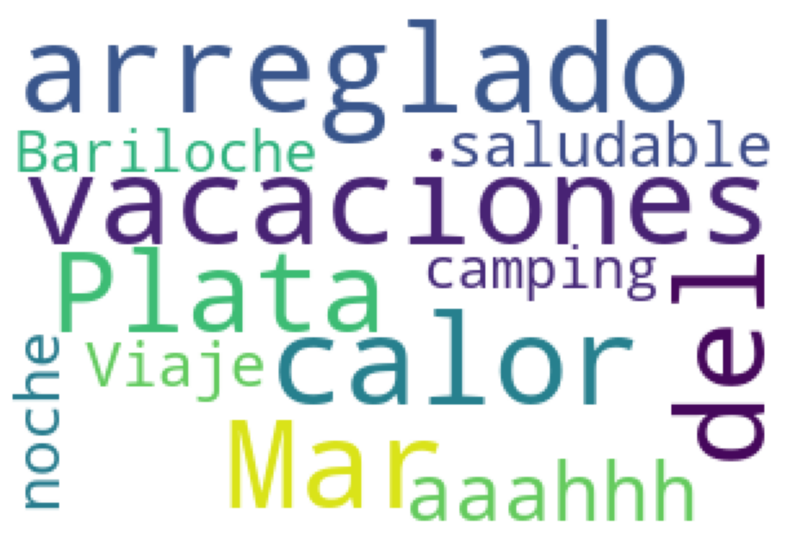

In [ ]:
wordcloud = WordCloud(
    width = 300,
    height = 200,
    random_state=1,
    background_color='white',
    collocations=False,
    stopwords = STOPWORDS
).generate(texto)

plot_nube(wordcloud)

### Nube de palabras de los textos agregados en los memes

Objetivo: generar un grafico de nube con los textos de memes

Del dataframe anterior, df_imagenes_memes, puedo obtener de la columna 'textos' la información voy a usar de las palabras utilizadas para generar los memes.

Las palabras de esa columna, sin repetirlas, son:

In [ ]:
textos_memes = df_imagenes_memes['textos'].unique()
textos_memes

array(['salvado;siiii', 'error404', 'caida;choque', 'system32',
       'llegamos;siiii', 'Linux;Mac;Windows', 'calculadora', 'trabajo'],
      dtype=object)

Siguiendo el mismo procedimiento que en la nube de collages, hago una limpieza de los strings y con eso ya puedo graficar la nube

In [ ]:
texto = str(textos_memes).replace("'", "")
texto

'[salvado;siiii error404 caida;choque system32 llegamos;siiii\n Linux;Mac;Windows calculadora trabajo]'

#### Grafico final:

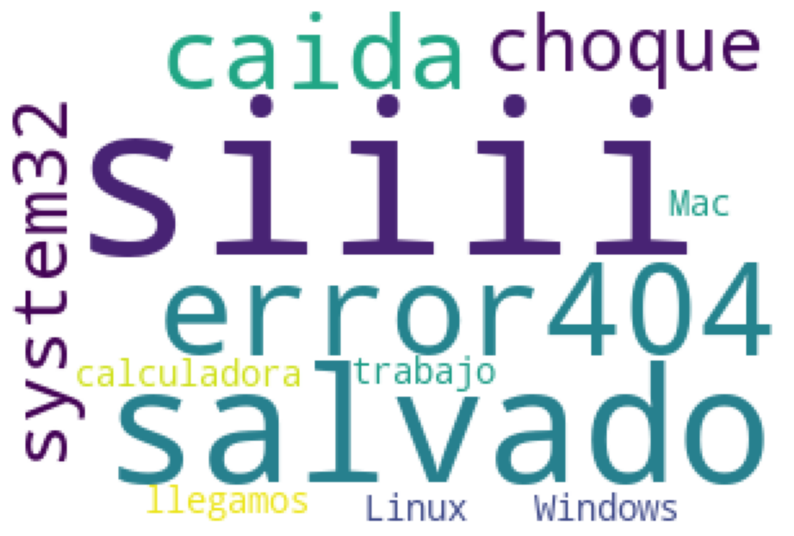

In [ ]:
wordcloud = WordCloud(
    width = 300,
    height = 200,
    random_state=1,
    background_color='white',
    collocations=False,
    stopwords = STOPWORDS
).generate(texto)

plot_nube(wordcloud)

### Gráfico con los porcentajes según género de las personas que realizaron la operacion Nueva imagen clasificada y cambio de imagen clasificada

Objetivo: generar un gráfico de torta que muestre los porcentajes según genero de quienes realizaron esas operaciones en unlpimage

Filtro del dataframe df_logs las filas que contengan en las columnas 'accion' las operaciones que estoy analizando.

Obtengo lo siguiente:

In [ ]:
df_nuevo_y_cambio_clasificacion = df_logs[(df_logs['accion'] == 'nueva_imagen_clasificada') | (df_logs['accion'] == 'cambio_imagen_clasificada')]
df_nuevo_y_cambio_clasificacion[['accion', 'genero']]

,accion,genero
2,nueva_imagen_clasificada,Masculino
22,cambio_imagen_clasificada,Masculino
25,nueva_imagen_clasificada,Femenino
27,cambio_imagen_clasificada,Masculino
29,cambio_imagen_clasificada,Masculino
34,cambio_imagen_clasificada,Masculino
35,nueva_imagen_clasificada,Masculino
40,cambio_imagen_clasificada,Femenino


Con esa información obtenida, puedo saber la cantidad de esas operacion por genero:

In [ ]:
nuevo_y_cambio_clasificacion = df_nuevo_y_cambio_clasificacion['genero'].value_counts()
nuevo_y_cambio_clasificacion

genero
Masculino    6
Femenino     2
Name: count, dtype: int64

Y esos son los datos que grafico

#### Gráfico final:

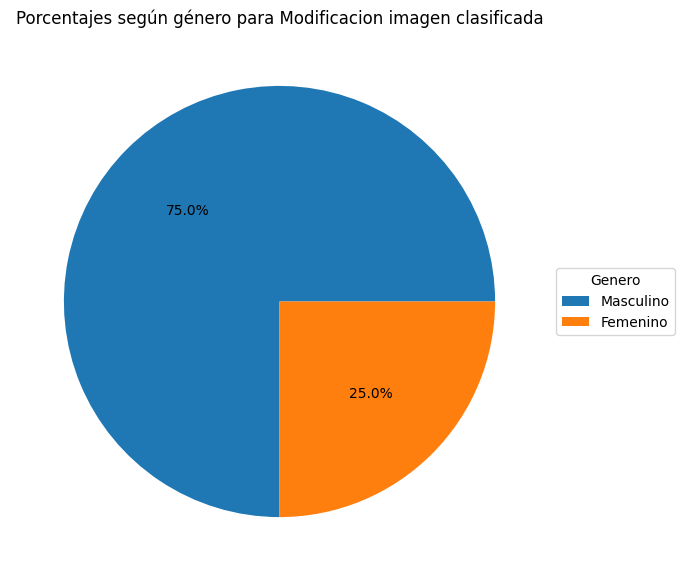

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(nuevo_y_cambio_clasificacion, autopct='%1.1f%%')

ax.legend(nuevo_y_cambio_clasificacion.index,
          title='Genero',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Porcentajes según género para Modificacion imagen clasificada')

plt.show()